In [2]:
import time, sys, joblib

import pandas as pd

sys.path.append('/home/yilingh/SI-Interaction')
from selectinf.Simulation.plotting_helpers import *
from selectinf.Simulation.H1.nonlinear_H1_helpers import *

In [3]:
##%%
from operator import le, ge
# Filter p-values according to target sizes (approx. null v.s. signal)
def filter_pval_dict(pval_dict, target_dict, threshold=0.05, operator=le):
    target_dict_df = pd.DataFrame(target_dict)
    filtered_dict = {}
    for par in pval_dict.keys():
        filtered_dict[par] = {}
        par_dict = pval_dict[par]
        target_df_par = target_dict_df[target_dict_df['parameter'] == par]
        
        for method in par_dict.keys():
            targets_p_m = (target_df_par[target_df_par['method'] == method])['target']
            selected_targets = operator(np.abs(targets_p_m), threshold)
            pvals_p_m = np.array(pval_dict[par][method])
            filtered_dict[par][method] = pvals_p_m[selected_targets].tolist()
    
    return filtered_dict

def calculate_thresholded_power(pivot, targets, level, threshold=0.05,
                                operator=ge):
    pivot = np.array(pivot)
    targets = np.array(targets)
    non_null = operator(np.abs(targets), threshold)
    rejection = 2 * np.min([pivot, 1 - pivot], axis=0) < level
    if np.sum(non_null) == 0:
        return 0
    else:
        true_rej = np.sum(non_null * rejection) / np.sum(non_null)

    return true_rej

# Vary Main with Weak Hierarchy

In [4]:
#dir_list_wh1_5 = ['results0_8_wh1.5.pkl']
dir_list_wh1_5 = ['results0_80_wh1.5.pkl', 'results80_160_wh1.5.pkl',
               'results160_240_wh1.5.pkl', 'results240_320_wh1.5.pkl',
               'results320_400_wh1.5.pkl', 'results400_480_wh1.5.pkl',
               'results480_560_wh1.5.pkl', 'results560_640_wh1.5.pkl'
               ]
dir_list_wh1 = ['results0_80_wh1.0.pkl', 'results80_160_wh1.0.pkl',
               'results160_240_wh1.0.pkl', 'results240_320_wh1.0.pkl',
               'results320_400_wh1.0.pkl', 'results400_480_wh1.0.pkl',
               'results480_560_wh1.0.pkl', 'results560_640_wh1.0.pkl'
               ]
dir_list_wh2_5 = ['results0_80_wh2.5.pkl', 'results80_160_wh2.5.pkl',
               'results160_240_wh2.5.pkl', 'results240_320_wh2.5.pkl',
               'results320_400_wh2.5.pkl', 'results400_480_wh2.5.pkl',
               'results480_560_wh2.5.pkl', 'results560_640_wh2.5.pkl'
               ]
dir_list_wh_c = ['results0_80_wh0.0.pkl', 'results80_160_wh0.0.pkl',
               'results160_240_wh0.0.pkl', 'results240_320_wh0.0.pkl',
               'results320_400_wh0.0.pkl', 'results400_480_wh0.0.pkl',
               'results480_560_wh0.0.pkl', 'results560_640_wh0.0.pkl'
               ]
#dir_list_wh = ['results0_40_wh.pkl']
#dir_list_wh = ['results0_20_wh1.5.pkl']

In [5]:
opers1 = []
pvals1 = []
targets1 = []
for path in dir_list_wh1:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers1.append(combine_lists(list_of_oper))
    pvals1.append(combine_nested_lists(list_of_pval))
    targets1.append(combine_lists(list_of_targets))

opers1_5 = []
pvals1_5 = []
targets1_5 = []
for path in dir_list_wh1_5:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers1_5.append(combine_lists(list_of_oper))
    pvals1_5.append(combine_nested_lists(list_of_pval))
    targets1_5.append(combine_lists(list_of_targets))

opers2_5 = []
pvals2_5 = []
targets2_5 = []
for path in dir_list_wh2_5:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers2_5.append(combine_lists(list_of_oper))
    pvals2_5.append(combine_nested_lists(list_of_pval))
    targets2_5.append(combine_lists(list_of_targets))
    
opers_c = []
pvals_c = []
targets_c = []
for path in dir_list_wh_c:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers_c.append(combine_lists(list_of_oper))
    pvals_c.append(combine_nested_lists(list_of_pval))
    targets_c.append(combine_lists(list_of_targets))

In [148]:
result1_5 = joblib.load('results0_8_wh1.5.pkl')

In [165]:
len(result1_5)

4

In [13]:
pvals1_5[0][2].keys()

dict_keys(['Naive', 'Data Splitting', 'MLE'])

In [14]:
oper_char1 = combine_lists(opers1)
oper_char1_5 = combine_lists(opers1_5)
oper_char2_5 = combine_lists(opers2_5)
oper_char_c = combine_lists(opers_c)

In [15]:
pvals_all1 = combine_nested_lists(pvals1)
pvals_all1_5 = combine_nested_lists(pvals1_5)
pvals_all2_5 = combine_nested_lists(pvals2_5)
pvals_all_c = combine_nested_lists(pvals_c)

In [16]:
targets_all1 = combine_lists(targets1)
targets_all1_5 = combine_lists(targets1_5)
targets_all2_5 = combine_lists(targets2_5)
targets_all_c = combine_lists(targets_c)

In [18]:
pd.DataFrame(targets_all1)

,parameter,target,target id,method,index,pivot
0,2,1.528656,"(0, 1)",Naive,0,0.154328
1,2,0.601398,"(0, 2)",Naive,0,0.148845
2,2,1.418276,"(0, 3)",Naive,0,0.164856
3,2,1.859440,"(0, 4)",Naive,0,0.147016
4,2,1.942472,"(0, 5)",Naive,0,0.083970
...,...,...,...,...,...,...
285803,1,0.433165,"(11, 15)",MLE,639,0.055721
285804,1,0.316947,"(11, 16)",MLE,639,0.270233
285805,1,0.135699,"(11, 17)",MLE,639,0.415076
285806,1,0.439245,"(11, 18)",MLE,639,0.303556


# Plotting ECDF of Null & Non-Null Targets

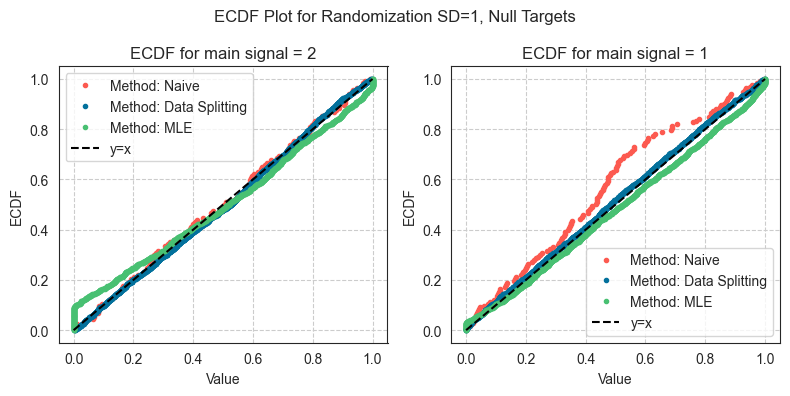

In [171]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all1, targets_all1, threshold = 0.1,
                                 operator=le)
plot_ecdfs(filtered_dict, xaxis="main signal", 
           title="ECDF Plot for Randomization SD=1, Null Targets")

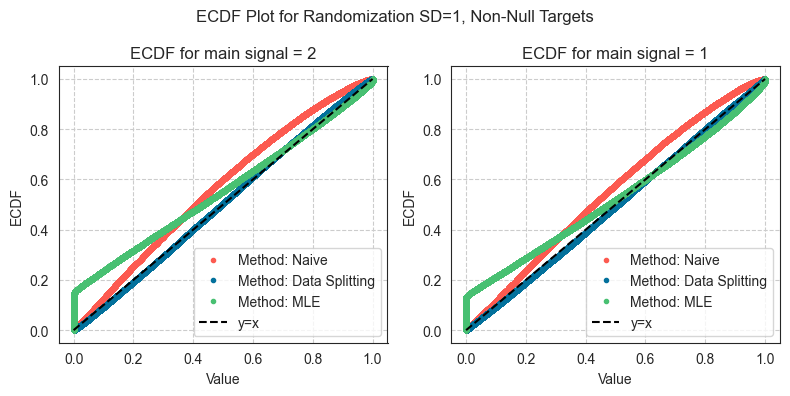

In [172]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all1, targets_all1, threshold = 0.1,
                                 operator=ge)
plot_ecdfs(filtered_dict, xaxis="main signal",
           title="ECDF Plot for Randomization SD=1, Non-Null Targets")

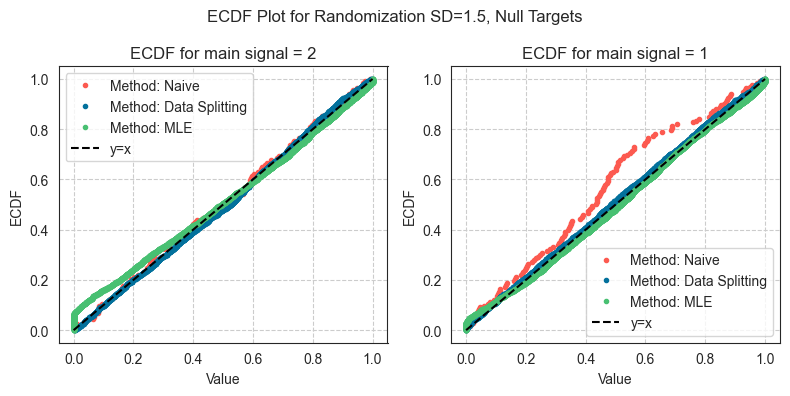

In [173]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all1_5, targets_all1_5, threshold = 0.1,
                                 operator=le)
plot_ecdfs(filtered_dict, xaxis="main signal", 
           title="ECDF Plot for Randomization SD=1.5, Null Targets")

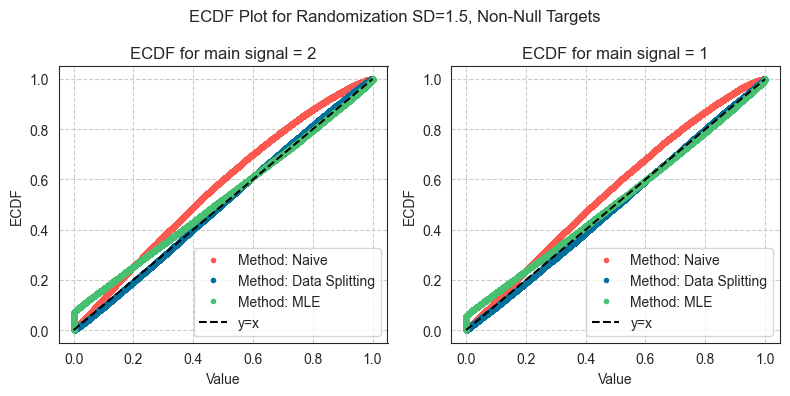

In [174]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all1_5, targets_all1_5, threshold = 0.1,
                                 operator=ge)
plot_ecdfs(filtered_dict, xaxis="main signal", 
           title="ECDF Plot for Randomization SD=1.5, Non-Null Targets")

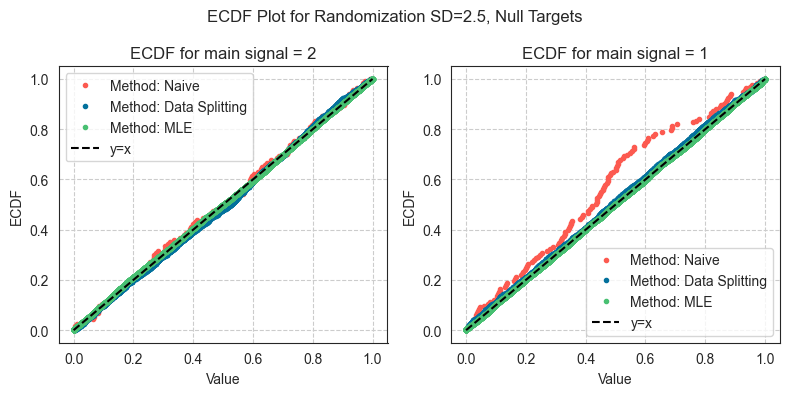

In [175]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all2_5, targets_all2_5, threshold = 0.1,
                                 operator=le)
plot_ecdfs(filtered_dict, xaxis="main signal",
           title="ECDF Plot for Randomization SD=2.5, Null Targets")

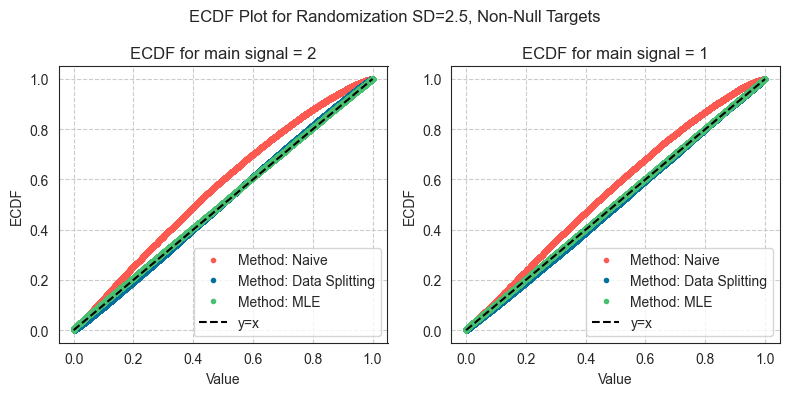

In [176]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all2_5, targets_all2_5, threshold = 0.1,
                                 operator=ge)
plot_ecdfs(filtered_dict, xaxis="main signal",
           title="ECDF Plot for Randomization SD=2.5, Non-Null Targets")

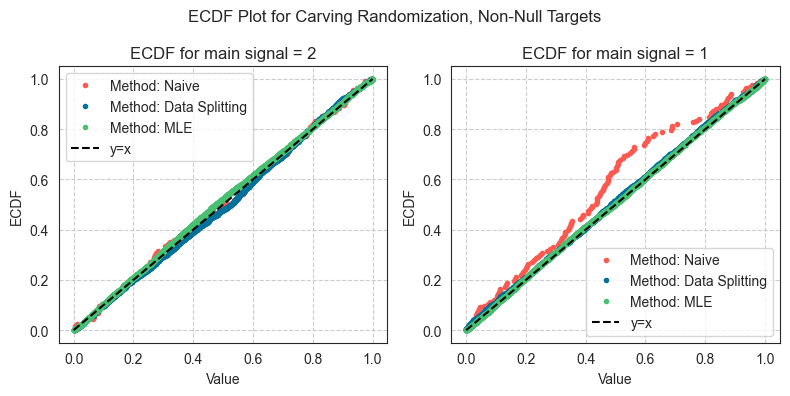

In [177]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all_c, targets_all_c, threshold = 0.1,
                                 operator=le)
plot_ecdfs(filtered_dict, xaxis="main signal",
           title="ECDF Plot for Carving Randomization, Non-Null Targets")

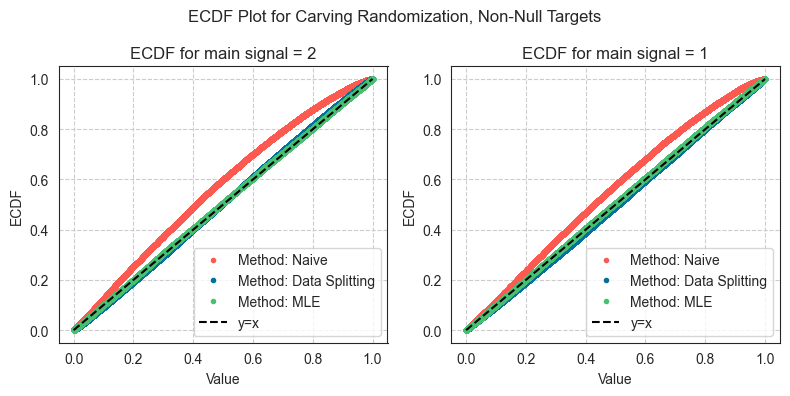

In [178]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all_c, targets_all_c, threshold = 0.1,
                                 operator=ge)
plot_ecdfs(filtered_dict, xaxis="main signal",
           title="ECDF Plot for Carving Randomization, Non-Null Targets")

# Plotting Projected True Targets

In [179]:
# List and array representations of true interaction indices
active_inter_list_true = np.array([[0, 1], [1, 2], [2, 4], [1, 5], [2, 6]])
active_inter_list_true_list = [(x[0], x[1]) for x in active_inter_list_true]

In [180]:
import ast
def filter_targets(targets_dict, true_inter_list):
    targets = targets_dict['target id']
    true_flag = [ast.literal_eval(t) in true_inter_list for t in targets]
    filtered_dict = {}
    for k in targets_dict.keys():
        filtered_dict[k] = np.array(targets_dict[k])[true_flag].tolist()
        
    return filtered_dict
        

In [181]:
##%%
def filter_targets_dict(target_dict, method='Naive'):
    filtered_dict = {}
    for par in target_dict.keys():
        filtered_dict[par] = (np.array(target_dict[par])[np.array(target_dict['method']) == method]).tolist()
    
    return filtered_dict

In [182]:
filtered_targets1 = filter_targets(targets_all1, active_inter_list_true_list)
filtered_targets1_5 = filter_targets(targets_all1_5, active_inter_list_true_list)
filtered_targets2_5 = filter_targets(targets_all2_5, active_inter_list_true_list)
filtered_targets_c = filter_targets(targets_all_c, active_inter_list_true_list)

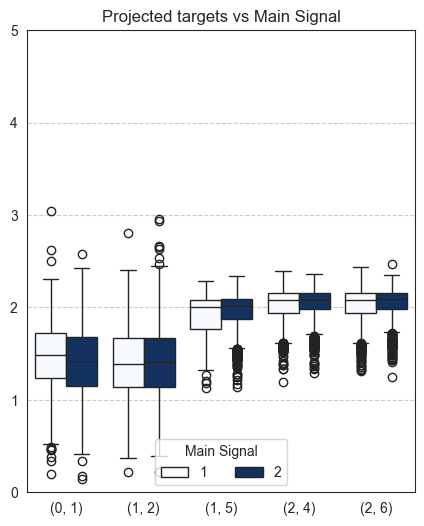

In [183]:
plot_multi_targets(filter_targets_dict(filtered_targets1,'Naive'), xaxis="Main Signal",
                   ylim_low=0, ylim_high=5)

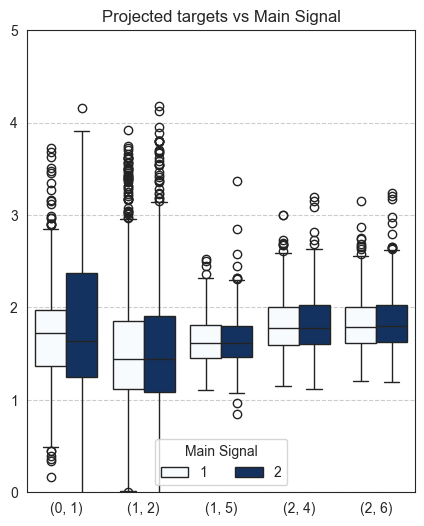

In [184]:
plot_multi_targets(filter_targets_dict(filtered_targets1,'Data Splitting'), 
                   xaxis="Main Signal", 
                   ylim_low=0, ylim_high=5)

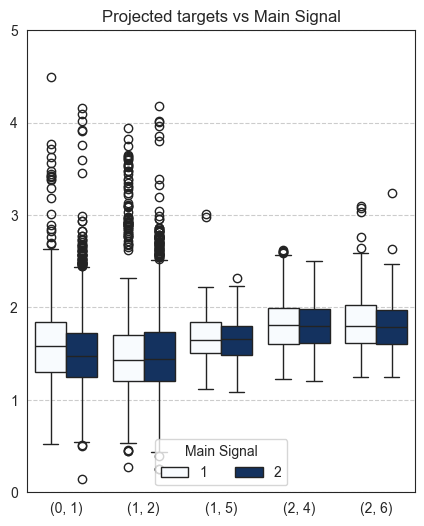

In [190]:
plot_multi_targets(filter_targets_dict(filtered_targets1,'MLE'), xaxis="Main Signal",
                   ylim_low=0, ylim_high=5)

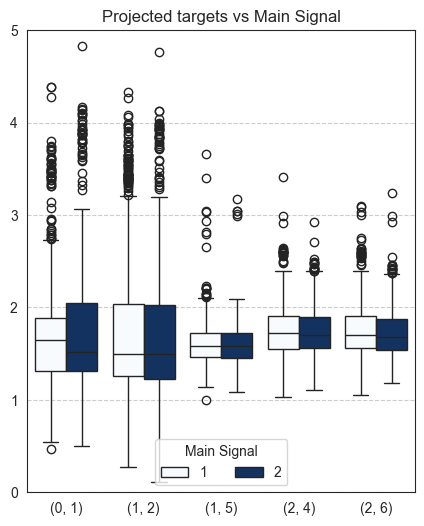

In [191]:
plot_multi_targets(filter_targets_dict(filtered_targets1_5,'MLE'), xaxis="Main Signal",
                   ylim_low=0, ylim_high=5)

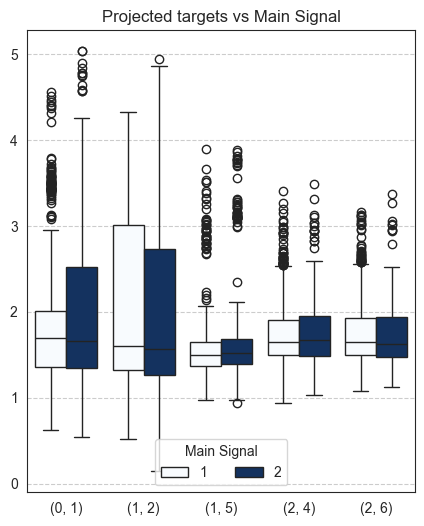

In [187]:
plot_multi_targets(filter_targets_dict(filtered_targets2_5,'MLE'), xaxis="Main Signal")

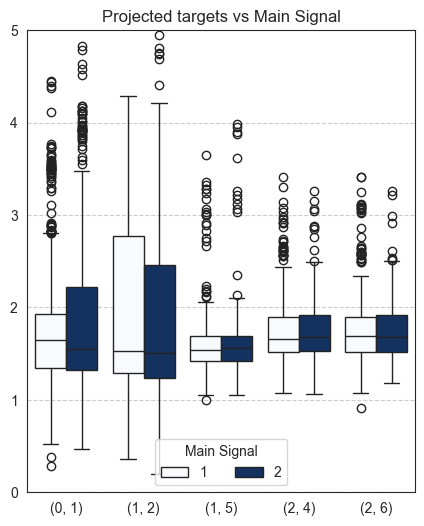

In [192]:
plot_multi_targets(filter_targets_dict(filtered_targets_c,'MLE'), xaxis="Main Signal",
                   ylim_low=0, ylim_high=5)

# Calculating Thresholded Power

In [189]:
def calculate_thresholded_power_df(targets_dict,
                                threshold=0.1,
                                level=0.1,
                                   operator=ge):
    grouped_targets = pd.DataFrame(targets_dict).groupby(['index',
                                                          'method', 'parameter'])
    power_df = {}
    power_df['parameter'] = []
    power_df['method'] = []
    power_df['thresholded power'] = []
    for name, group in grouped_targets:
        power_df['parameter'].append(name[2])
        power_df['method'].append(name[1])
        pivots = group['pivot']
        targets = group['target']
        power_df['thresholded power'].append(
            calculate_thresholded_power(pivots, targets, level=level, 
                                        threshold=threshold, operator=operator))
    return power_df

In [134]:
def point_plot_power(oper_char_dfs, x_axis='p', hue='method', 
                     ylim_low=None, ylim_high=None):
    for i in range(len(oper_char_dfs)):
        oper_char_dfs[i] = oper_char_dfs[i].copy()
    sns.set_style("white", {'axes.facecolor': 'white',
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                            })
    # sns.histplot(oper_char_df["sparsity size"])
    # plt.show()
    n_subplots = len(oper_char_dfs)
    # cols = int(np.ceil(n_subplots / 2))
    cols = n_subplots

    fig = plt.figure(figsize=(cols * 5, 6))

    my_palette = {"MLE": "#48c072",
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}

    # Create each subplot
    for i in range(1, n_subplots + 1):
        # ax = fig.add_subplot(2, cols, i) #two rows
        ax = fig.add_subplot(1, cols, i)  # one row
        if hue is not None:
            sns.pointplot(x=oper_char_dfs[i-1][x_axis],
                          y=oper_char_dfs[i-1]['thresholded power'],
                          hue=oper_char_dfs[i-1][hue],
                          markers='o',
                          palette=my_palette,
                          ax=ax)
        else:
            sns.pointplot(x=oper_char_dfs[i-1][x_axis],
                          y=oper_char_dfs[i-1]['thresholded power'],
                          markers='o',
                          palette=my_palette,
                          ax=ax)
        if ylim_low is not None and ylim_high is not None:
            ax.set_ylim([ylim_low, ylim_high])

        ax.legend().set_visible(False)

    handles, labels = ax.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)

    fig.subplots_adjust(bottom=0.3)
    fig.legend(handles, labels, loc='lower center', ncol=n_subplots,
               prop={'size': 15})

    # cov_plot.legend_.remove()
    # len_plot.legend_.remove()

    # plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()

In [135]:
power_df1 = calculate_thresholded_power_df(targets_dict=targets_all1, 
                                        threshold=0.1, level=0.1,
                                           operator=ge)
power_df1_5 = calculate_thresholded_power_df(targets_dict=targets_all1_5,
                                        threshold=0.1, level=0.1,
                                             operator=ge)
power_df2_5 = calculate_thresholded_power_df(targets_dict=targets_all2_5,
                                        threshold=0.1, level=0.1,
                                             operator=ge)
power_df_c = calculate_thresholded_power_df(targets_dict=targets_all_c,
                                        threshold=0.1, level=0.1,
                                             operator=ge)

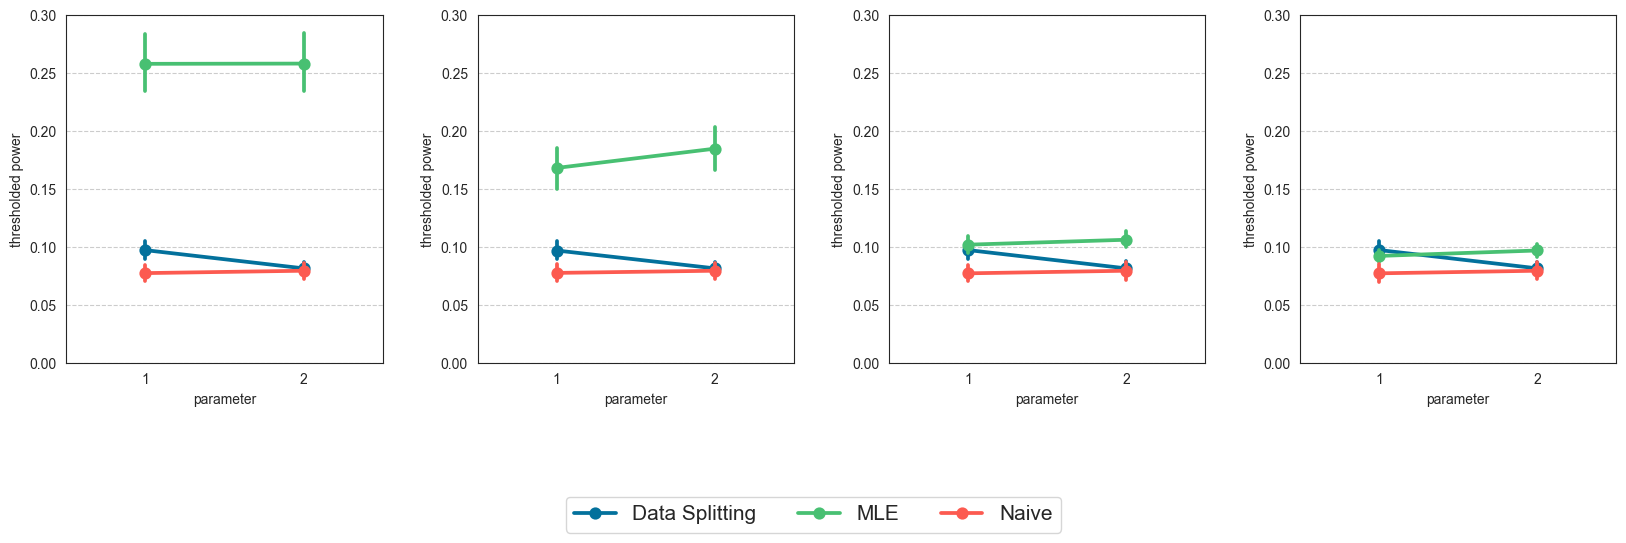

In [136]:
point_plot_power(oper_char_dfs=[pd.DataFrame(power_df1), 
                                      pd.DataFrame(power_df1_5),
                                      pd.DataFrame(power_df2_5),
                                pd.DataFrame(power_df_c)],
                 x_axis="parameter",
                 hue="method", ylim_high=0.3, ylim_low=0)

In [137]:
power_df1 = calculate_thresholded_power_df(targets_dict=targets_all1, 
                                        threshold=0.1, level=0.1,
                                           operator=le)
power_df1_5 = calculate_thresholded_power_df(targets_dict=targets_all1_5,
                                        threshold=0.1, level=0.1,
                                             operator=le)
power_df2_5 = calculate_thresholded_power_df(targets_dict=targets_all2_5,
                                        threshold=0.1, level=0.1,
                                             operator=le)
power_df_c = calculate_thresholded_power_df(targets_dict=targets_all_c,
                                        threshold=0.1, level=0.1,
                                             operator=le)

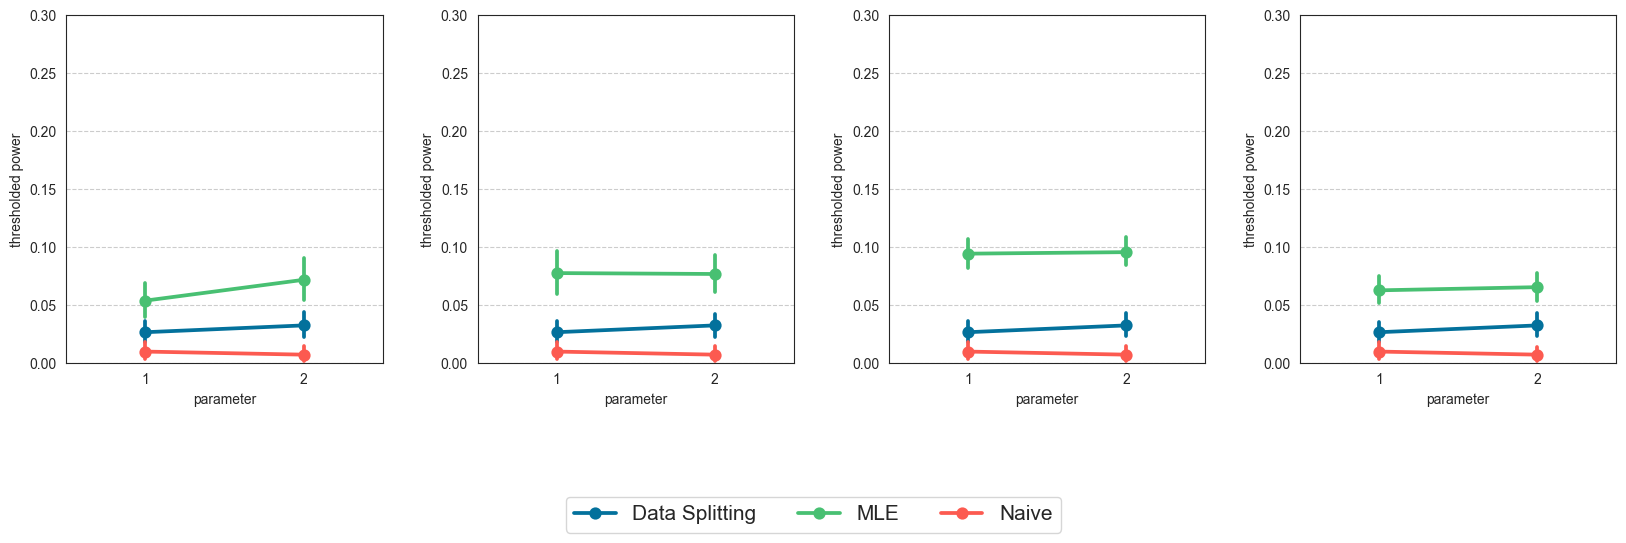

In [138]:
point_plot_power(oper_char_dfs=[pd.DataFrame(power_df1), 
                                      pd.DataFrame(power_df1_5),
                                      pd.DataFrame(power_df2_5),
                                pd.DataFrame(power_df_c)],
                 x_axis="parameter",
                 hue="method", ylim_high=0.3, ylim_low=0)

In [60]:
targets_df = pd.DataFrame(targets_all)

In [48]:
targets_df

,parameter,target,target id,method
0,10,1.548096,"(0, 1)",Naive
1,10,0.828848,"(0, 2)",Naive
2,10,1.479679,"(0, 3)",Naive
3,10,1.888243,"(0, 4)",Naive
4,10,1.958373,"(0, 5)",Naive
...,...,...,...,...
335674,1,-0.449803,"(14, 19)",MLE
335675,1,0.181771,"(15, 19)",MLE
335676,1,0.209295,"(16, 19)",MLE
335677,1,0.265221,"(17, 19)",MLE


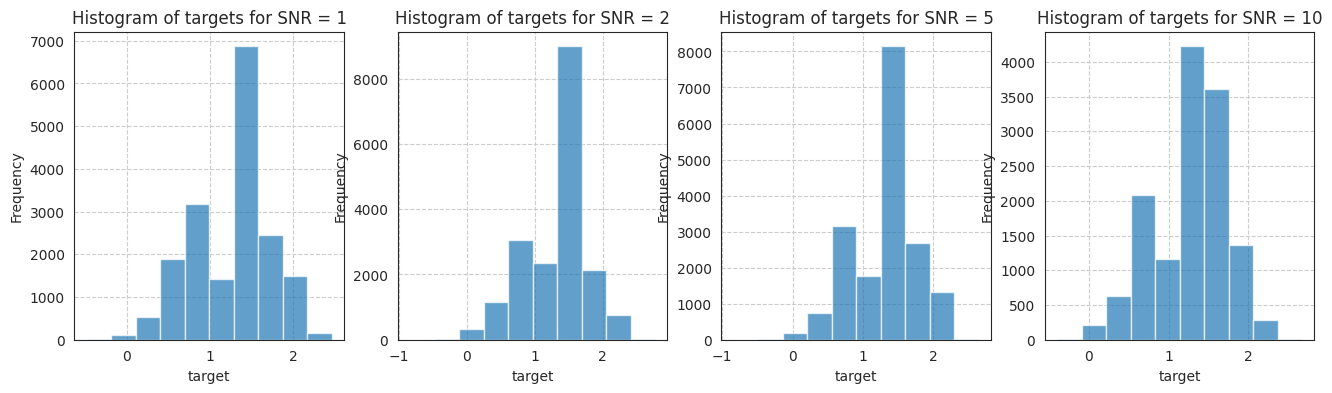

In [49]:
targets_df_naive = targets_df[targets_df['method']=='Naive']
# Grouping by 'y' and plotting histograms
grouped_targets = targets_df_naive.groupby('parameter')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
i = 0
for name, group in grouped_targets:
    axs[i].hist(group['target'], bins=10, alpha=0.7)
    axs[i].set_xlabel('target')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of targets for SNR = {name}')
    i += 1

In [85]:
int(0) == float(0.0)

True